# Name: Sarishti ,Roll No: 102317212 ,Group:3Q23

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", encoding="latin1")

x = pd.to_numeric(df["no2"], errors="coerce")
x = x.dropna()
x = x[x >= 0]
x = x.to_numpy(dtype=np.float64)

print("Number of samples:", len(x))

Number of samples: 419509


/tmp/ipython-input-1854461236.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding="latin1")


In [3]:
r = 102317212

a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

print("a_r =", a_r)
print("b_r =", b_r)

a_r = 0.2
b_r = 0.8999999999999999


In [4]:
z = x + a_r * np.sin(b_r * x)

print("z stats:")
print("Min:", z.min())
print("Max:", z.max())

z stats:
Min: 0.0
Max: 876.027860309666


In [5]:
mu_hat = np.mean(z)
var_hat = np.mean((z - mu_hat) ** 2)

lambda_hat = 1.0 / (2.0 * var_hat)
c_hat = np.sqrt(lambda_hat / np.pi)

print("Estimated Parameters")
print("mu (μ) =", mu_hat)
print("lambda (λ) =", lambda_hat)
print("c  =", c_hat)

Estimated Parameters
mu (μ) = 25.804091267939096
lambda (λ) = 0.0014593812811420303
c  = 0.021553085382354755


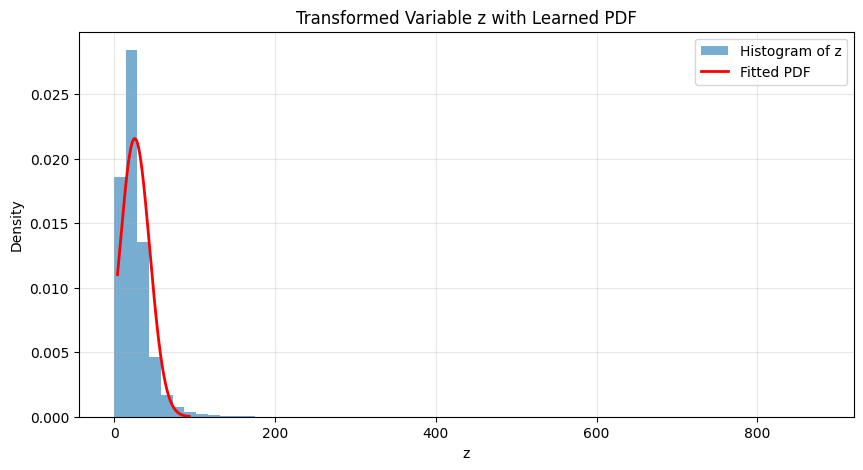

In [9]:
def pdf_est(z_vals, lam, mu, c):
    return c * np.exp(-lam * (z_vals - mu) ** 2)

z_grid = np.linspace(np.percentile(z, 1), np.percentile(z, 99), 500)
pdf_vals = pdf_est(z_grid, lambda_hat, mu_hat, c_hat)

plt.figure(figsize=(10, 5))
plt.hist(z, bins=60, density=True, alpha=0.6, label="Histogram of z")
plt.plot(z_grid, pdf_vals, 'r', linewidth=2, label="Fitted PDF")
plt.xlabel("z")
plt.ylabel("Density")
plt.title("Transformed Variable z with Learned PDF")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("fit_plot.png", dpi=200, bbox_inches="tight")
plt.show()



In [8]:
print("FINAL  VALUES")
print("μ =", mu_hat)
print("λ =", lambda_hat)
print("c =", c_hat)


FINAL  VALUES
μ = 25.804091267939096
λ = 0.0014593812811420303
c = 0.021553085382354755
